# Criando os nomes

In [1]:
# importando biblioteca

import pandas as pd
import numpy as np

In [2]:
# lendo o link e visualizando somente do sexo feminino
nomes_f = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f')
nomes_f

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
195,ROSANE,0,82203,196,F
196,IVONETE,0,81878,197,F
197,LUCIANE,0,81230,198,F
198,ISADORA,0,81100,199,F


In [3]:
# lendo o link e visualizando somente do sexo masculino
nomes_m = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m')
nomes_m

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
...,...,...,...,...,...
195,WALTER,0,67207,196,M
196,ARLINDO,0,66669,197,M
197,MICHAEL,0,65736,198,M
198,ALVARO,0,65444,199,M


In [4]:
# printando a quantidade de alunos
print("Quantidade de alunos é "  + str(len(nomes_f) + len(nomes_m)))

Quantidade de alunos é 400


In [5]:
# Juntando os dois dataframes 
frames = [nomes_f, nomes_m]

In [6]:
# concatendando e informando qual coluna queremos somente e transformando em um dataframe
nomes  = pd.concat(frames)['nome'].to_frame()
nomes

,nome
0,MARIA
1,ANA
2,FRANCISCA
3,ANTONIA
4,ADRIANA
...,...
195,WALTER
196,ARLINDO
197,MICHAEL
198,ALVARO


In [7]:
# pegando 5 nomes aleatórios
nomes.sample(5)

,nome
104,REINALDO
137,NAIR
35,CARLA
117,PAMELA
31,RICARDO


# Incluindo ID dos alunos

In [8]:
# Gerando a  mesma sequencia de numeros aleatorios depois do 123
np.random.seed(123)

In [9]:
# atribuindo o valor do tamanho do datframe nomes para total alunos
total_alunos = len(nomes)
total_alunos

400

In [10]:
# criando nova coluna, e colocando um id aleatorio entre 1 a 400 para cada nome
nomes["id_aluno"] = np.random.permutation(total_alunos) + 1

In [11]:
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [12]:
# criando dois domínio de e-mail
dominios = ['@hotmail.com.br', '@outlook.com' ]

In [13]:
# criando uma coluna dominio do e-mail e distribuindo cada dominio para cada nome aleatorioamente, lembrando que nao é numero
# no caso uitlizamos choice
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [14]:
nomes.sample(5)

,nome,id_aluno,dominio
84,SEVERINO,78,@hotmail.com.br
0,JOSE,331,@outlook.com
179,IAGO,340,@hotmail.com.br
10,SANDRA,174,@hotmail.com.br
171,TERESINHA,45,@hotmail.com.br


In [15]:
# criando coluna e-mail,  pegando a coluna nome , juntando com dominio, transformando em string  e deixando tudo em letra minuscula
nomes['e-mail'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [16]:
nomes.sample(5)

,nome,id_aluno,dominio,e-mail
114,ARTHUR,320,@hotmail.com.br,arthur@hotmail.com.br
57,DAIANE,303,@outlook.com,daiane@outlook.com
85,HELENA,221,@hotmail.com.br,helena@hotmail.com.br
183,IRACI,8,@hotmail.com.br,iraci@hotmail.com.br
189,DALVA,137,@hotmail.com.br,dalva@hotmail.com.br


# Criando a tabela cursos

In [17]:
# instalando modulos para leitura de dados html
!pip3 install html5lib
!pip3 install lxml

In [18]:
# importando biblioteca
import html5lib

In [19]:
# criando a variavel url que contem os cursos e lendo o link
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)

In [20]:
# visualizando os dados
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [21]:
# verificando o tipo
type(cursos)

list

In [22]:
# convertendo a lista em um dataframe
cursos = cursos[0]

In [23]:
type(cursos)

pandas.core.frame.DataFrame

In [24]:
# visulizando
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando index

In [25]:
# renomeando a coluna nome do curso
cursos = cursos.rename(columns={'Nome do curso': 'nome_do_curso'})

In [26]:
cursos.head()

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [27]:
# criando id para os cursos
cursos['id'] = cursos.index + 1

In [28]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [29]:
# utilizando id como index do dataframe
cursos = cursos.set_index('id')

In [30]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


# Matriculando os alunos nos cursos

In [51]:
# criando uma variavel quantidade de matricula que cada aluno tem, e que o minimo nao seja 0, com isso usamos np.ceil
nomes['matricula'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [59]:
# renomeando a coluna matricula 
nomes = nomes.rename(columns={'matricula': 'matriculas'})

In [60]:
nomes.sample(5)

,nome,id_aluno,dominio,e-mail,matriculas
154,NICOLE,182,@hotmail.com.br,nicole@hotmail.com.br,2
29,TIAGO,267,@hotmail.com.br,tiago@hotmail.com.br,1
64,VIVIANE,396,@outlook.com,viviane@outlook.com,1
165,EUNICE,62,@outlook.com,eunice@outlook.com,6
108,VILMA,31,@outlook.com,vilma@outlook.com,3


In [61]:
# verifificando como fica a distribuição da matricula 
nomes.matriculas.describe()

count    400.00000
mean       2.05000
std        1.67317
min        1.00000
25%        1.00000
50%        2.00000
75%        3.00000
max       17.00000
Name: matriculas, dtype: float64

# Plotando os graficos


In [63]:
# importando biblioteca
import seaborn as sns

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='matriculas', ylabel='Density'>

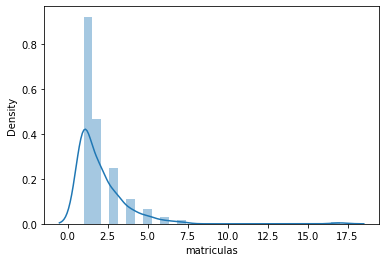

In [74]:
# plotando as observações matriculas
sns.distplot(nomes.matriculas)

In [75]:
# verificando quantas matriculas temos para cada curso
nomes.matriculas.value_counts()

1     197
2     100
3      53
4      24
5      14
6       6
7       4
17      2
Name: matriculas, dtype: int64

# Selecionando Cursos

In [76]:
nomes.sample(5)

,nome,id_aluno,dominio,e-mail,matriculas
34,SEBASTIAO,152,@outlook.com,sebastiao@outlook.com,1
172,WANDERSON,312,@hotmail.com.br,wanderson@hotmail.com.br,1
76,TATIANE,203,@hotmail.com.br,tatiane@hotmail.com.br,5
101,SILVIO,363,@hotmail.com.br,silvio@hotmail.com.br,1
157,CONCEICAO,153,@hotmail.com.br,conceicao@hotmail.com.br,1


In [80]:
# Criando um calculo aleatorio
# Quantidade de matriculas de cada aluno
# calculando de forma randomica os 20 cursos

todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [84]:
# atribuindo os cursos de forma aleatoria para cada aluno
# usando itterrows para ele retornar linha a linnha
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas): # que seja do tamanho da matriculas 
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat) # atribuindo todas as matriculas 
        
#crinado dataframe matriculas com duas colunas somente
matriculas = pd.DataFrame(todas_matriculas, columns= ['id_aluno', 'id_curso'])

In [85]:
matriculas

,id_aluno,id_curso
0,235,9
1,43,16
2,43,11
3,43,16
4,43,20
...,...,...
815,323,18
816,383,20
817,383,19
818,366,11


In [102]:
# Quantos alunos tem em cada curso?
# agrupando por id do curso e fazendo a frequuencia
# Juntando com o dataframe cursos da coluna nome do curso
# renomeando a coluna id_aluno para quantidade de cursos
matriculas_p_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns = {'id_aluno': 'quantidade_de_alunos'})
matriculas_p_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,2,Lógica de programação
2,1,Java para Web
3,64,C# para Web
4,47,Ruby on Rails
5,24,Cursos de Python
6,79,PHP com MySql
7,65,.NET para web
8,44,Novas integrações com Java
9,49,TDD com Java


In [97]:
nomes.sample(3)

,nome,id_aluno,dominio,e-mail,matriculas
114,ELZA,380,@hotmail.com.br,elza@hotmail.com.br,2
193,LUCILENE,146,@hotmail.com.br,lucilene@hotmail.com.br,3
10,SANDRA,174,@hotmail.com.br,sandra@hotmail.com.br,3


In [99]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [103]:
matriculas_p_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,2,Lógica de programação
2,1,Java para Web
3,64,C# para Web
4,47,Ruby on Rails
5,24,Cursos de Python


# Saída em diferentes formatos

In [104]:
# exportando para csv
matriculas_p_curso.to_csv('matriculas_por_curso.csv', index = False)

In [105]:
# lendo o arquivo
dados = pd.read_csv('matriculas_por_curso.csv')
dados

,quantidade_de_alunos,nome_do_curso
0,2,Lógica de programação
1,1,Java para Web
2,64,C# para Web
3,47,Ruby on Rails
4,24,Cursos de Python
5,79,PHP com MySql
6,65,.NET para web
7,44,Novas integrações com Java
8,49,TDD com Java
9,55,Código limpo com C#


In [107]:
# transformando agora em json
matriculas_json = matriculas_p_curso.to_json()

In [108]:
matriculas_json

'{"quantidade_de_alunos":{"1":2,"2":1,"3":64,"4":47,"5":24,"6":79,"7":65,"8":44,"9":49,"10":55,"11":47,"12":15,"13":67,"14":1,"15":46,"16":57,"17":64,"18":34,"19":40,"20":19},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [109]:
# transormando agora em html
matriculas_html = matriculas_p_curso.to_html()

In [110]:
matriculas_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>quantidade_de_alunos</th>\n      <th>nome_do_curso</th>\n    </tr>\n    <tr>\n      <th>id_curso</th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>1</th>\n      <td>2</td>\n      <td>Lógica de programação</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>1</td>\n      <td>Java para Web</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>64</td>\n      <td>C# para Web</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>47</td>\n      <td>Ruby on Rails</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>24</td>\n      <td>Cursos de Python</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>79</td>\n      <td>PHP com MySql</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>65</td>\n      <td>.NET para web</td>\n    </tr>\n    <tr>\n      <th>8</th>\n      <td>44</td>\n      <td>Novas integrações com Java</td>\n  

In [111]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>2</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>64</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>47</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>24</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>79</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>65</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>44</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>49</td>
  

# Criando banco SQL

Lemos uma tabela do banco com a função read_sql_table() e exibimos o resultado de uma query com o comando read_sql(), passando a query como parâmetro

In [112]:
# instalando modulo
!pip install sqlalchemy

In [113]:
# importando
from sqlalchemy import create_engine, MetaData, Table

In [115]:
# salvando nos dados locais
engine = create_engine('sqlite:///:memory:')

In [116]:
engine

Engine(sqlite:///:memory:)

In [118]:
type(engine)

sqlalchemy.engine.base.Engine

In [119]:
matriculas_p_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,2,Lógica de programação
2,1,Java para Web
3,64,C# para Web
4,47,Ruby on Rails
5,24,Cursos de Python


In [120]:
# transformando em sql. Necessario passar dois parametros o nome da tabela e o engine
matriculas_p_curso.to_sql('matriculas', engine)

In [121]:
print(engine.table_names())

['matriculas']


<ipython-input-121-7f622051bbf8>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  print(engine.table_names())


# Buscando no banco SQL

In [122]:
# criando a query
query = 'select * from matriculas  where quantidade_de_alunos < 20'

In [123]:
# rodando a query
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,1,2,Lógica de programação
1,2,1,Java para Web
2,12,15,Hardware básico
3,14,1,Desenvolvendo jogos
4,20,19,Orientação objetos com Java


In [124]:
# alterando a ordem das colunas
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,2
1,Java para Web,1
2,C# para Web,64
3,Ruby on Rails,47
4,Cursos de Python,24
5,PHP com MySql,79
6,.NET para web,65
7,Novas integrações com Java,44
8,TDD com Java,49
9,Código limpo com C#,55


In [125]:
#  atribuindo a variavel muitas_matriculas
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

In [128]:
# vendo os cursos com quantidade de alunos maior que 60
muitas_matriculas.query('quantidade_de_alunos > 70')

,nome_do_curso,quantidade_de_alunos
5,PHP com MySql,79


In [129]:
# atribuindo a uma variavel
qtd_maior_70 = muitas_matriculas.query('quantidade_de_alunos > 70')

In [131]:
qtd_maior_70

,nome_do_curso,quantidade_de_alunos
5,PHP com MySql,79


# Escrevendo no banco

In [132]:
qtd_maior_70.to_sql('qtd_maior_70', con=engine)

In [134]:
print(engine.table_names())

['matriculas', 'qtd_maior_70']


<ipython-input-134-7f622051bbf8>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  print(engine.table_names())


# Nomes de alunos e alunas da proxima turma

In [135]:
#visualizando dataframe
matriculas_p_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,2,Lógica de programação
2,1,Java para Web
3,64,C# para Web
4,47,Ruby on Rails
5,24,Cursos de Python
6,79,PHP com MySql
7,65,.NET para web
8,44,Novas integrações com Java
9,49,TDD com Java


In [136]:
#visualizando dataframe
matriculas

,id_aluno,id_curso
0,235,9
1,43,16
2,43,11
3,43,16
4,43,20
...,...,...
815,323,18
816,383,20
817,383,19
818,366,11


In [138]:
#Selecionando um id
# crindo uma query para buscar somente os alunos com id do curso 19
id_curso = 19
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))
proxima_turma

,id_aluno,id_curso
110,303,19
131,73,19
134,232,19
177,213,19
195,149,19
231,178,19
328,202,19
336,105,19
353,45,19
399,137,19


In [139]:
# Fazendo join com duas tabelas, para assim saber quem é a pessoa que esta no curso id 19 
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,e-mail,matriculas
id_aluno,,,,,
4,19,MOISES,@outlook.com,moises@outlook.com,1
9,19,RENAN,@hotmail.com.br,renan@hotmail.com.br,1
35,19,NILZA,@hotmail.com.br,nilza@hotmail.com.br,1
44,19,NICOLAS,@hotmail.com.br,nicolas@hotmail.com.br,1
45,19,TERESINHA,@hotmail.com.br,teresinha@hotmail.com.br,2
57,19,EDILSON,@outlook.com,edilson@outlook.com,2
59,19,FABRICIO,@hotmail.com.br,fabricio@hotmail.com.br,3
73,19,ISABELA,@hotmail.com.br,isabela@hotmail.com.br,2
84,19,KAUAN,@outlook.com,kauan@outlook.com,3


In [140]:
# Passando somente o nome do aluno
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
4         MOISES
9          RENAN
35         NILZA
44       NICOLAS
45     TERESINHA
57       EDILSON
59      FABRICIO
73       ISABELA
84         KAUAN
97         ELTON
105       MARISA
110      OSVALDO
111     ANDERSON
112         EDER
119     VALDEMAR
134       GILSON
137        DALVA
149     MARILENE
178      JOSIANE
202        ESTER
208         LUIZ
213     ANDRESSA
216       VICTOR
232     CAROLINE
272       OTAVIO
295       MAICON
303       DAIANE
311        ANDRE
312    WANDERSON
326     EDMILSON
327    GUILHERME
331         JOSE
339       THIAGO
341    ALEXANDRO
346       LURDES
361       NILSON
364      ROBERTO
364      ROBERTO
365      FABIANO
383       ALVARO
Name: nome, dtype: object

In [142]:
# transformando a lista em um dataframe
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
4,MOISES
9,RENAN
35,NILZA
44,NICOLAS
45,TERESINHA
57,EDILSON
59,FABRICIO
73,ISABELA
84,KAUAN


In [144]:
# vefificando o nome do curso cujo id é 19
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Boas práticas em Java
Name: 19, dtype: object

In [146]:
# atribuindo a variavel nome curso, o nome do curso do dataframe
nome_curso = nome_curso.nome_do_curso
nome_curso

'Boas práticas em Java'

In [147]:
# atribuindo o dataframe a varivel
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [150]:
# alterando o nome da coluna nome
# atribuindo a variavel
proxima_turma = proxima_turma.rename(columns={'nome': 'Alunos do curso {}'.format(nome_curso)})

In [151]:
# visualizando 
proxima_turma

,Alunos do curso Boas práticas em Java
id_aluno,
4,MOISES
9,RENAN
35,NILZA
44,NICOLAS
45,TERESINHA
57,EDILSON
59,FABRICIO
73,ISABELA
84,KAUAN


# Excel

In [152]:
# exportando nosso dataframe proxima turma para excel
proxima_turma.to_excel('proxima_turma.xlsx', index = False)

In [153]:
# lendo o arquiv
pd.read_excel('proxima_turma.xlsx')

,Alunos do curso Boas práticas em Java
0,MOISES
1,RENAN
2,NILZA
3,NICOLAS
4,TERESINHA
5,EDILSON
6,FABRICIO
7,ISABELA
8,KAUAN
9,ELTON
